# La visualización de datos 

*Isaac Zainea, Daniel Montenegro y Antonino Zainea*

Un ejercicio fundamental en la analítica de datos es la visualización, una disciplina que tiene el objetivo es exponer de forma gráfica las diferentes realidades y relaciones de los datos. No solo nos restringimos a mostrar los diferentes valores, numéricos y no numéricos, que toman las variables que analizamos sino que buscamos describir de manera clara el fenómeno latente en la información.

## Gráficos para cada situación

![Visual Chart](https://miro.medium.com/max/960/1*JxbqIQmD_E3M3I7Tjo0OqA.jpeg)

*Tomado de: [https://towardsdatascience.com/5-quick-and-easy-data-visualizations-in-python-with-code-a2284bae952f](https://towardsdatascience.com/5-quick-and-easy-data-visualizations-in-python-with-code-a2284bae952f)*

### Diagramas de barras

Pasará mucho tiempo mientras reconocemos el gráfico indicado para expresar una situación concreta. No obstante Python con su paquete matplotlib nos ofrece la posibilidad de generar distintos gráficos que podemos usar. Describiremos algunos de los más interesantes mientras explicamos la sintáxis del paquete.

Iniciamos importandolo:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Adicional definimos una lista de datos:

In [2]:
x_data=["Primer\nSemestre","Segundo\nSemestre","Tercer\nSemestre","Cuarto\nSemestre"]
y_data=[66,43,38,30]

El paquete matplotlib genera elementos y mediante adición de capas hace los gráficos que solicitamos, una herramienta útil es crear funciones que hagan ese ejercicio por nosotros. A continuación definimos una función para crear diagramas de barras:

In [3]:
def barplot(x_data, y_data, x_label="", y_label="", title="",color="#539caf",sizeh=5,sizev=5):
    _, ax = plt.subplots(figsize=(sizeh,sizev))# Creación del objeto
    ax.bar(x_data, y_data, color = color, align = 'center') #capas
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)


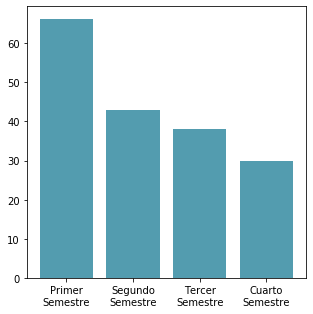

In [4]:
barplot(x_data,y_data)

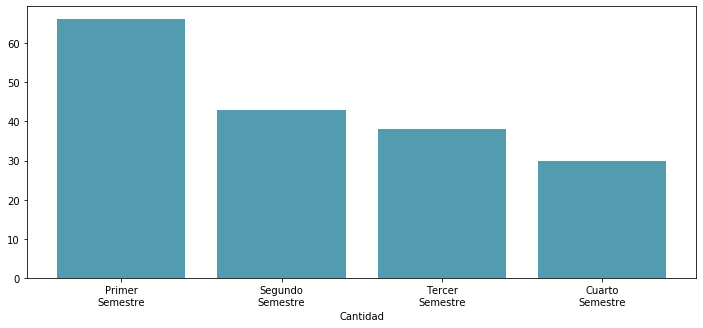

In [5]:
barplot(x_data,y_data,x_label="Cantidad",sizeh=12)

In [6]:
def stackedbarplot(x_data, y_data_list, colors, y_data_names=["Data1","Data2"], x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

In [7]:
y_data_list=[[22,21,24,23],[12,15,16,11]]

In [8]:
y_data_list[1]

[12, 15, 16, 11]

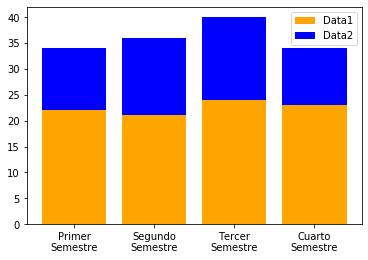

In [9]:
stackedbarplot(x_data,y_data_list,colors=["orange","blue"])

In [10]:
def groupedbarplot(x_data, y_data_list, colors, y_data_names=["Data1","Data2"], x_label="", y_label="", title=""):
    x_ax=np.arange(len(x_data))
    _, ax = plt.subplots()
    # Total width for all bars at one x location
    total_width = 0.8
    # Width of each individual bar
    ind_width = total_width / len(y_data_list)
    # This centers each cluster of bars about the x tick mark
    alteration = np.arange(-(total_width/2), total_width/2, ind_width)

    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        # Move the bar to the right on the x-axis so it doesn't
        # overlap with previously drawn ones
        ax.bar(x_ax + alteration[i], y_data_list[i], color = colors[i],label = y_data_names[i],width = ind_width)
    plt.xticks(x_ax-ind_width/2, x_data),
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

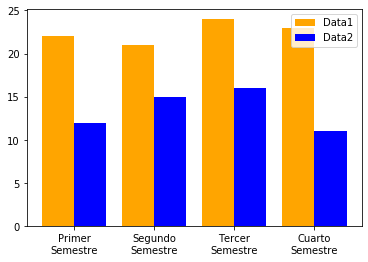

In [11]:
groupedbarplot(x_data,y_data_list,colors=["orange","blue"])

### Gráficos de dispersión

Son usados para visualizar la relación entre variables cuantitativas, sin embargo, el uso de colores permite visualizar las relaciones y los agrupamientos según una variable categórica que puede estar relacionada. Así mismo, usando el diametro de los puntos se puede involucrar una tercera variable.

In [51]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False,s=10):

    # Create the plot object
    _, ax = plt.subplots()


    ax.scatter(x_data, y_data, s = s, color = len(y_data)//len(color)*color+color[0:len(y_data)%len(color)], alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

Graficaremos un conjunto aleatorio de valores:

In [55]:
import random
x=random.choices(range(1,20),k=50)
y=random.choices(range(1,20),k=50)

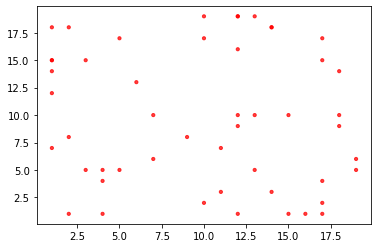

In [57]:
scatterplot(x,y)

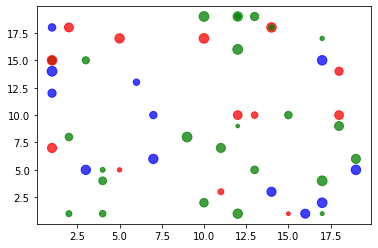

In [63]:
size=100*random.choices(range(10,100),k=50)
scatterplot(x,y,color=['r','g','b','g'],s=size)

### Graficos de línea

Utiles para visualizar series de tiempo, procesos evolutivos, frecuencias acumuladas, entre otros:

In [69]:
def lineplot(x_data, y_data, x_label="", y_label="", title="",color='#539caf', ancholinea=2):
    _, ax = plt.subplots()

    ax.plot(x_data, y_data, lw = ancholinea, color = color, alpha = 1)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


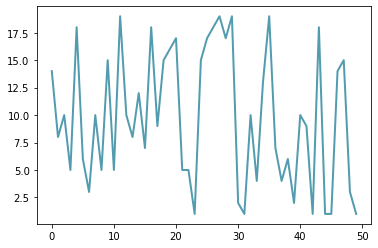

In [70]:
x=np.arange(50)
lineplot(x,y)

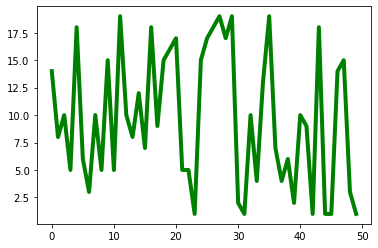

In [71]:
lineplot(x,y,color='g',ancholinea=4)

## Histograma

Para visualizar distribuciones de variables cuantitativas:

In [97]:
from matplotlib import colors
def histogram(data, n_cajas=5, cumulative=False, x_label = "", y_label = "", title = "", color = '#539caf'):
    _, ax = plt.subplots()
    ax.hist(data, bins =n_cajas, cumulative = cumulative, color = color)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

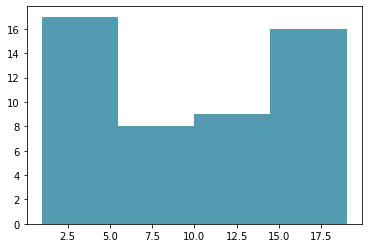

In [98]:
histogram(y,n_cajas=4)

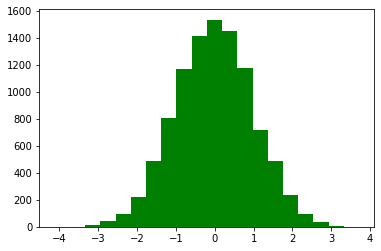

In [108]:
x = np.random.randn(10000)
histogram(x,n_cajas=20,color='g')

### Box plot

Información del rango intercuartilico de las variables

In [112]:
def boxplot(x_labeld, y_data, base_color="#539caf", median_color="#297083", x_label="", y_label="", title=""):
    _, ax = plt.subplots()

    # Draw boxplots, specifying desired style
    ax.boxplot(y_data
               # patch_artist must be True to control box fill
               , patch_artist = True
               # Properties of median line
               , medianprops = {'color': median_color}
               # Properties of box
               , boxprops = {'color': base_color, 'facecolor': base_color}
               # Properties of whiskers
               , whiskerprops = {'color': base_color}
               # Properties of whisker caps
               , capprops = {'color': base_color})

    # By default, the tick label starts at 1 and increments by 1 for
    # each box drawn. This sets the labels to the ones we want
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

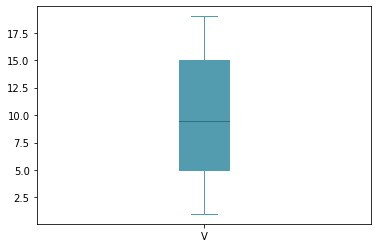

In [116]:
boxplot("V",y)